In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-07-16 21:24:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   163MB/s    in 0.9s    

2020-07-16 21:24:40 (163 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/train')
zip_ref.close()

In [3]:
train_horse_dir = os.path.join('/tmp/train/horses')
train_human_dir = os.path.join('/tmp/train/humans')

## Sample Images

In [4]:
names_train_horse = os.listdir(train_horse_dir)
names_train_human = os.listdir(train_human_dir)

print(names_train_horse[:10])
print(names_train_human[:10])

['horse41-8.png', 'horse31-2.png', 'horse28-7.png', 'horse04-2.png', 'horse42-9.png', 'horse11-7.png', 'horse48-8.png', 'horse36-6.png', 'horse43-2.png', 'horse47-8.png']
['human07-04.png', 'human15-00.png', 'human07-25.png', 'human16-28.png', 'human16-09.png', 'human16-30.png', 'human17-11.png', 'human05-02.png', 'human17-17.png', 'human03-19.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


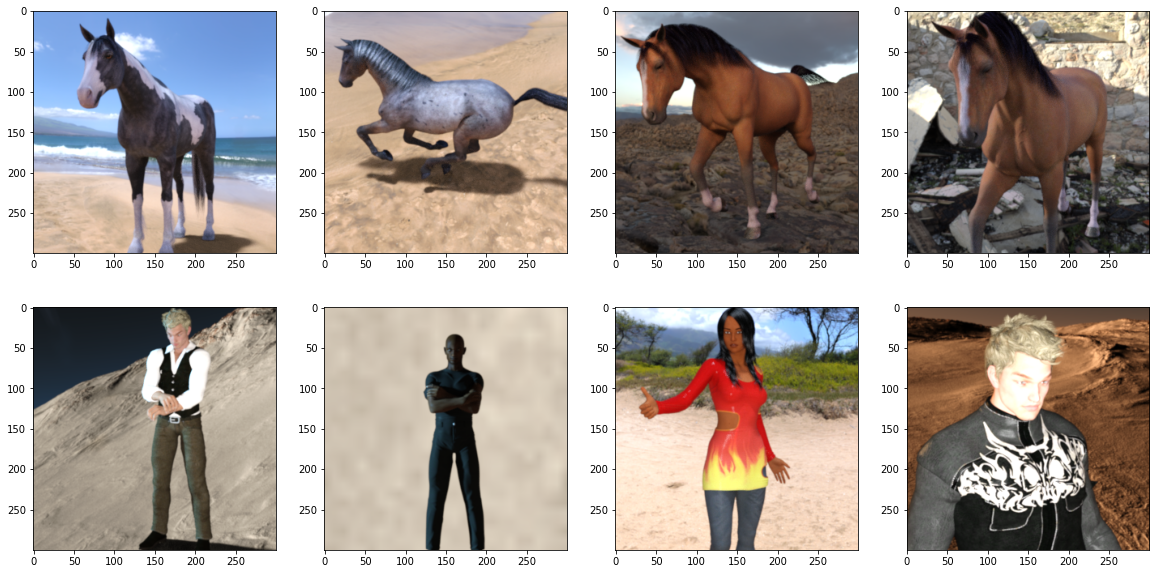

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(20, 10))

for i in range(4):
  plt.subplot(2, 4, i+1)
  n = random.randrange(len(os.listdir(train_horse_dir)))
  img = mpimg.imread(os.path.join(train_horse_dir, names_train_horse[n]))
  plt.imshow(img)

  plt.subplot(2, 4, i+5)
  n = random.randrange(len(os.listdir(train_human_dir)))
  img = mpimg.imread(os.path.join(train_human_dir, names_train_human[n]))
  plt.imshow(img)


# Data Preprocessing

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory('/tmp/train/',
                                                    target_size=(300, 300),        
                                                    batch_size=128,
                                                    class_mode='binary')

Found 1027 images belonging to 2 classes.


# Making Model

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Only 1 output neuron
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,
                    steps_per_epoch=8,  
                    epochs=15,
                    verbose=1)

Epoch 1/15
8/8 [==============================] - 63s 8s/step - loss: 1.1373 - accuracy: 0.4961
Epoch 2/15
8/8 [==============================] - 63s 8s/step - loss: 0.6467 - accuracy: 0.6563
Epoch 3/15
8/8 [==============================] - 64s 8s/step - loss: 0.8223 - accuracy: 0.6340
Epoch 4/15
8/8 [==============================] - 74s 9s/step - loss: 0.5878 - accuracy: 0.7442
Epoch 5/15
8/8 [==============================] - 62s 8s/step - loss: 0.3611 - accuracy: 0.8231
Epoch 6/15
8/8 [==============================] - 64s 8s/step - loss: 0.5719 - accuracy: 0.7931
Epoch 7/15
8/8 [==============================] - 63s 8s/step - loss: 0.3537 - accuracy: 0.8921
Epoch 8/15
8/8 [==============================] - 63s 8s/step - loss: 0.2099 - accuracy: 0.9210
Epoch 9/15
8/8 [==============================] - 63s 8s/step - loss: 0.2642 - accuracy: 0.8865
Epoch 10/15
8/8 [==============================] - 64s 8s/step - loss: 0.0824 - accuracy: 0.9766
Epoch 11/15
8/8 [======================

# Testing Model Manually

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

## Visualize Intermediate Representation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


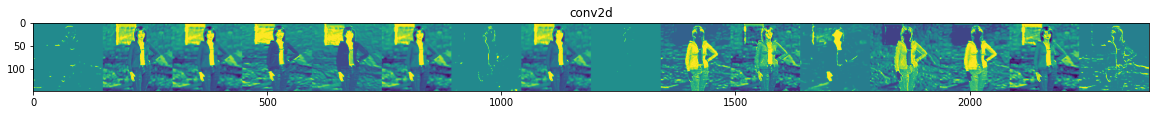

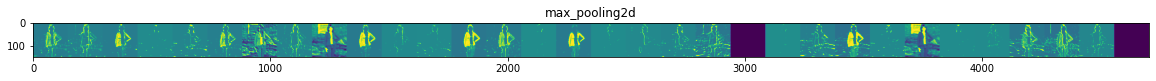

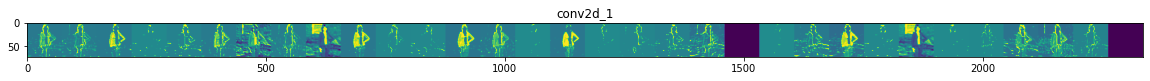

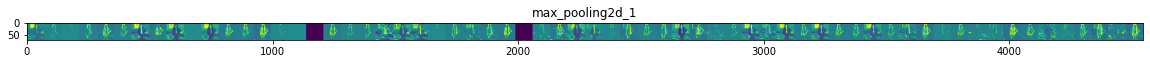

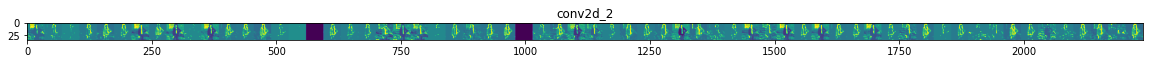

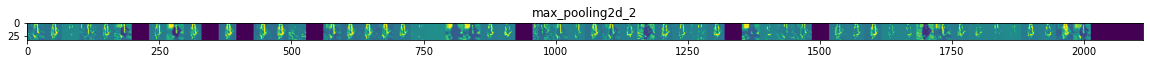

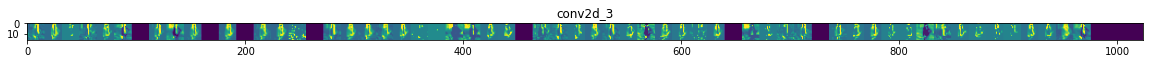

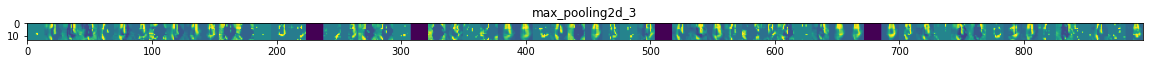

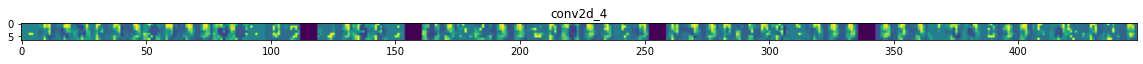

In [15]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in names_train_horse]
human_img_files = [os.path.join(train_human_dir, f) for f in names_train_human]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')